In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
HouseDF = pd.read_csv('USA_Housing.csv')
HouseDF.head()
HouseDF=HouseDF.reset_index()
HouseDF.head()
HouseDF.info()
HouseDF.describe()
HouseDF.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   float64
 3   Avg. Area Number of Rooms     5000 non-null   float64
 4   Avg. Area Number of Bedrooms  5000 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Address                       5000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


Index(['index', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

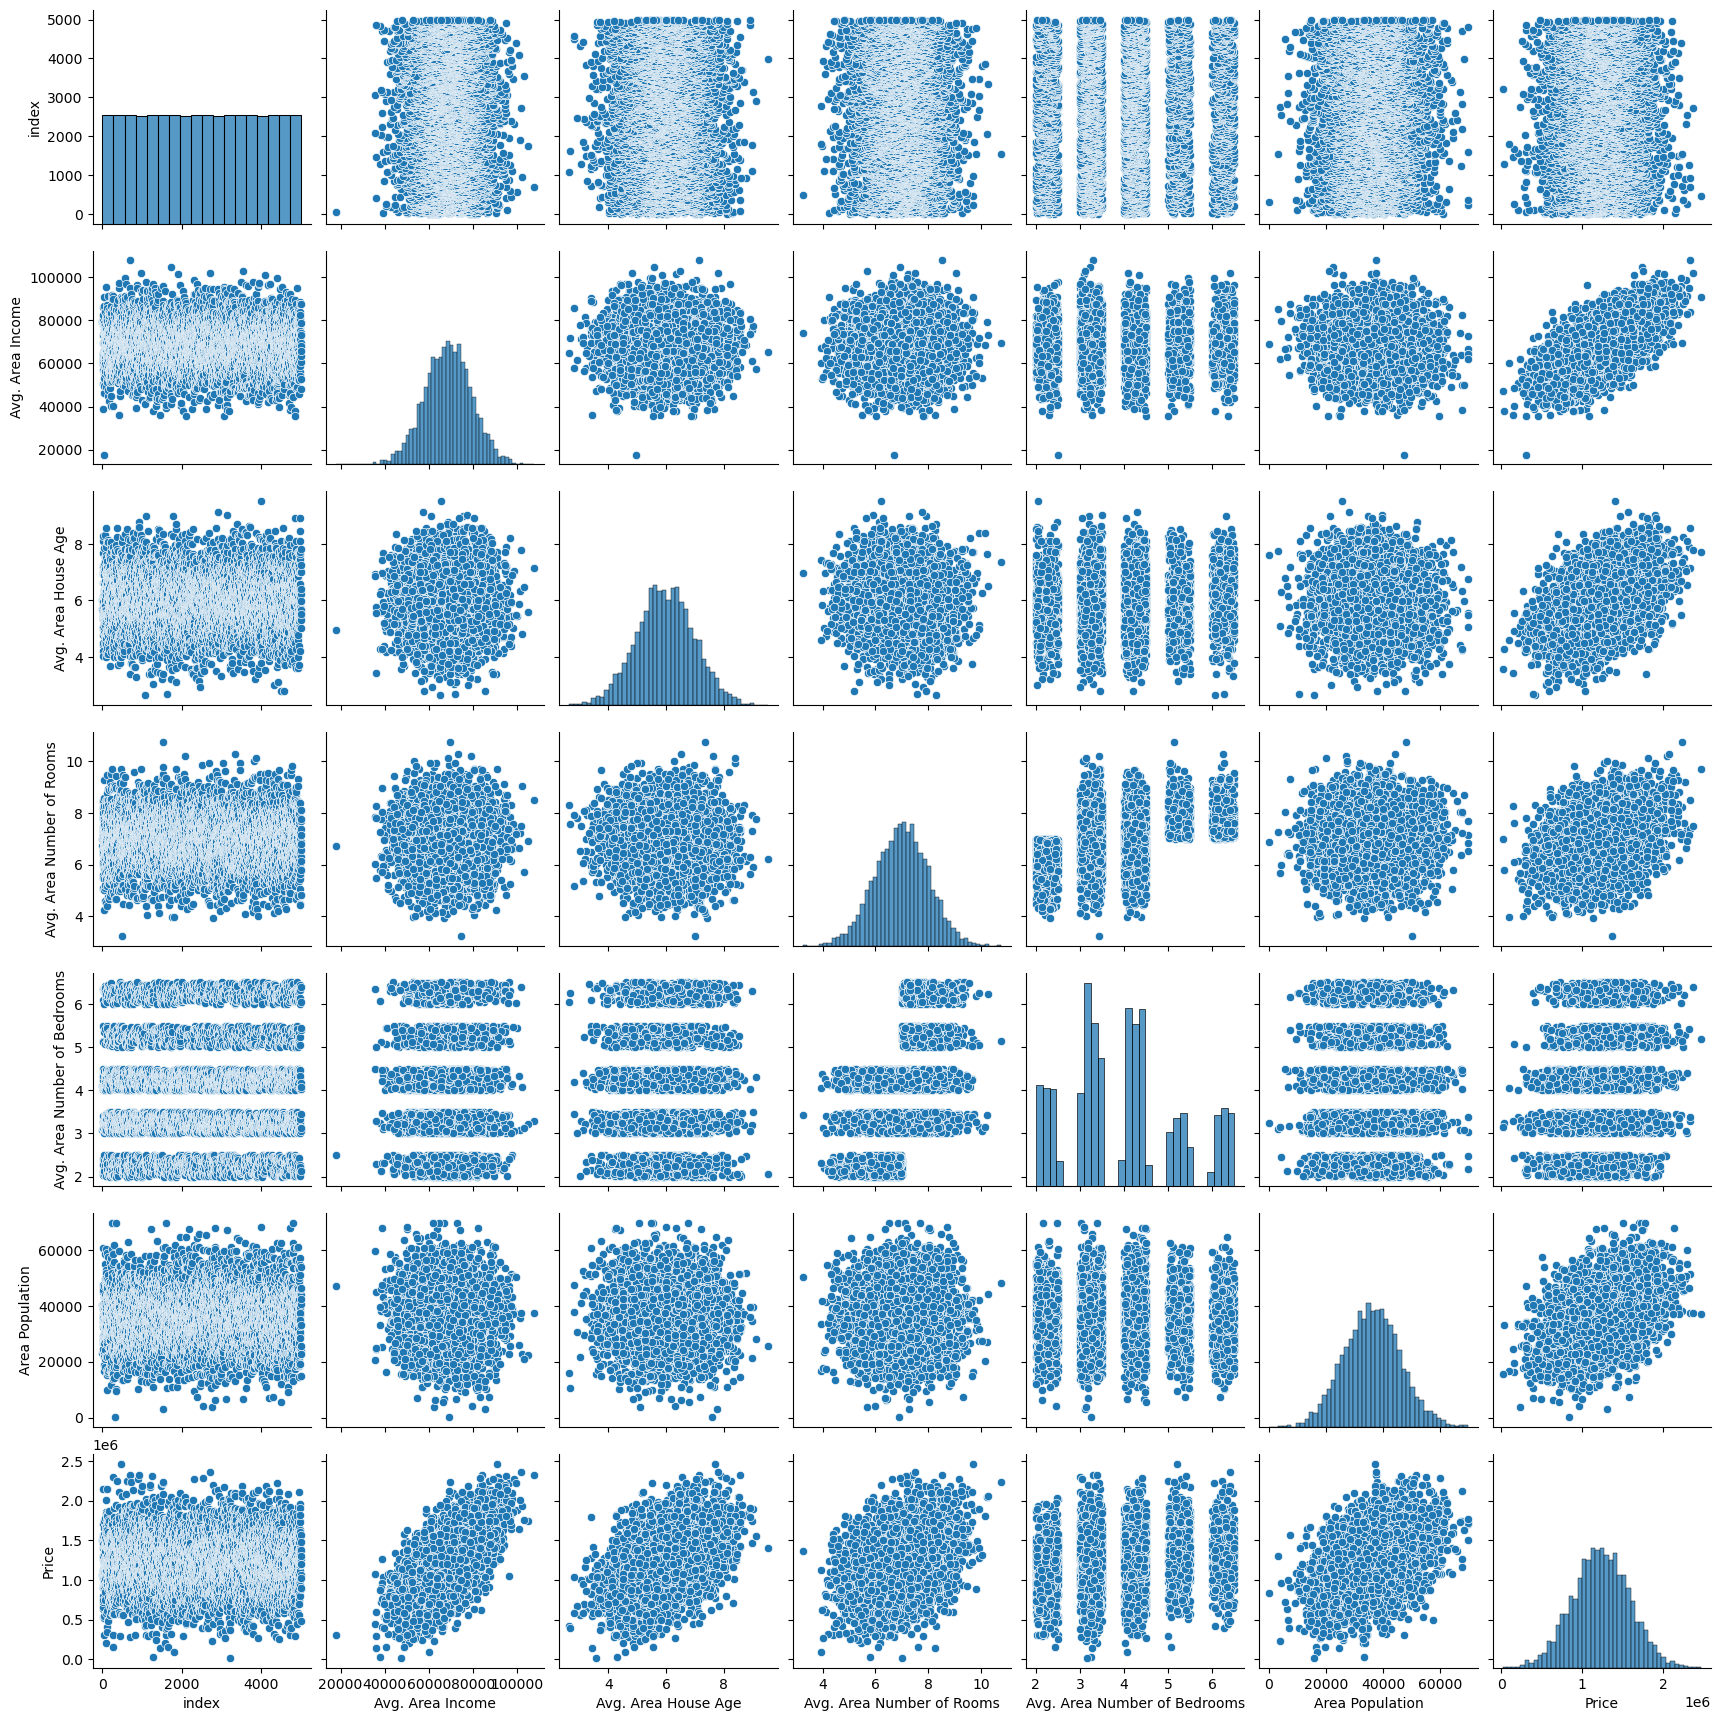

In [12]:
sns.pairplot(HouseDF)

C:\Users\kotap\AppData\Local\Temp\ipykernel_8248\3832333452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HouseDF["Price"])


<Axes: xlabel='Price', ylabel='Density'>

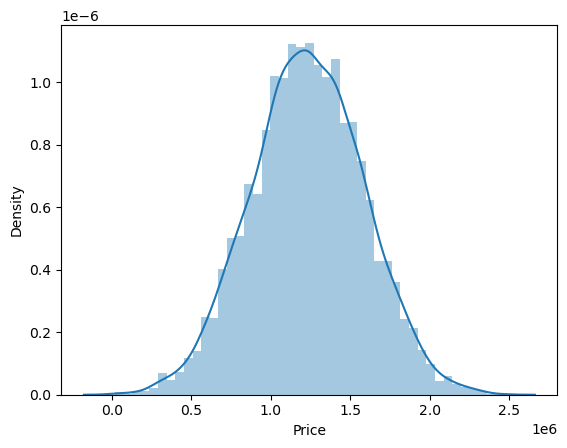

In [13]:
sns.distplot(HouseDF["Price"])

C:\Users\kotap\AppData\Local\Temp\ipykernel_8248\3588014427.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HouseDF.corr(), annot=True)


<Axes: >

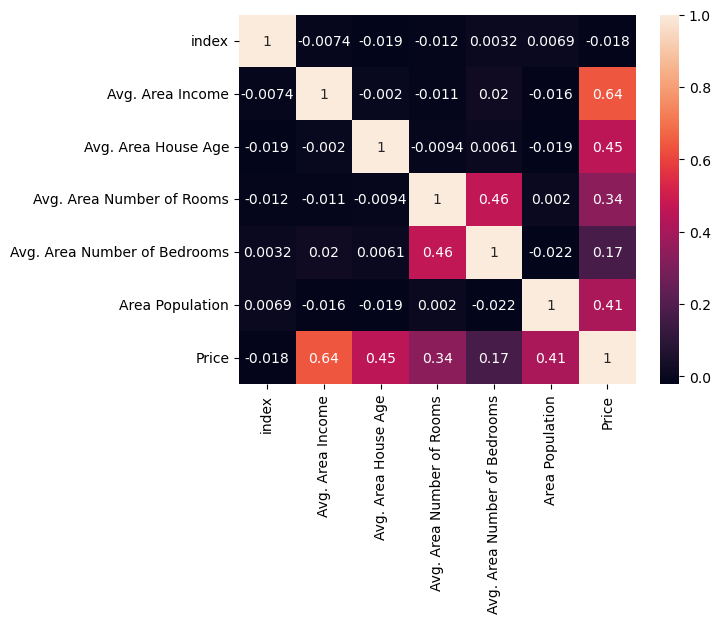

In [14]:
sns.heatmap(HouseDF.corr(), annot=True)

In [17]:
X = HouseDF[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms","Avg. Area Number of Bedrooms", "Area Population"]]
y = HouseDF["Price"]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=101)
#lm = MinMaxScaler(feature_range=(0,1))
#lm.fit_transform(X_train,y_train)
#print(lm.intercept_)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# Access the intercept of the linear regression model
print("Intercept:", lm.intercept_)

Intercept: -877972.9916972383


In [31]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Area Income,1.555354e+06
Avg. Area House Age,1.108258e+06
Avg. Area Number of Rooms,8.332528e+05
Avg. Area Number of Bedrooms,1.005211e+04
Area Population,1.005022e+06


In [35]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape =
(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss = "mean_squared_error")
model.fit(X_train, y_train,epochs=50)
print(lm.intercept_)


Epoch 1/50

94/94 [==============================] - 11s 32ms/step - loss: 1213312663552.0000
Epoch 2/50
94/94 [==============================] - 3s 31ms/step - loss: 217333547008.0000
Epoch 3/50
94/94 [==============================] - 3s 30ms/step - loss: 171318083584.0000
Epoch 4/50
94/94 [==============================] - 3s 31ms/step - loss: 172291817472.0000
Epoch 5/50
94/94 [==============================] - 3s 31ms/step - loss: 154238631936.0000
Epoch 6/50
94/94 [==============================] - 3s 30ms/step - loss: 150063874048.0000
Epoch 7/50
94/94 [==============================] - 3s 31ms/step - loss: 144225435648.0000
Epoch 8/50
94/94 [==============================] - 3s 32ms/step - loss: 143243591680.0000
Epoch 9/50
94/94 [==============================] - 3s 31ms/step - loss: 142811234304.0000
Epoch 10/50
94/94 [==============================] - 3s 31ms/step - loss: 135906189312.0000
Epoch 11/50
94/94 [==============================] - 3s 31ms/step - loss: 14222149222

In [41]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])
coeff_df
predictions = lm.predict(X_test)

C:\Users\kotap\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


C:\Users\kotap\AppData\Local\Temp\ipykernel_8248\3976763822.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


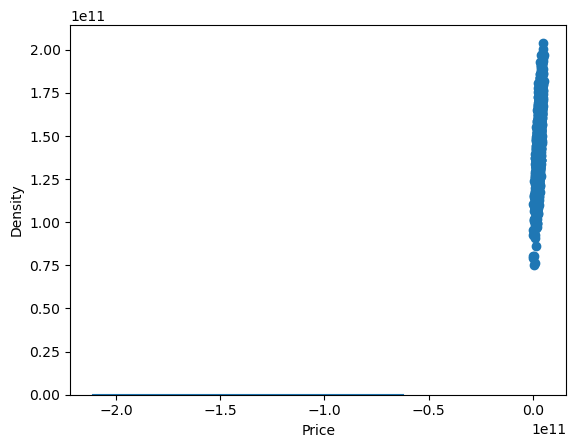

In [42]:
scale_factor = 1/0.02099517
y_predicted = predictions * scale_factor
y_test = y_test * scale_factor
plt.scatter(y_test,predictions)
sns.distplot((y_test-predictions),bins=50);

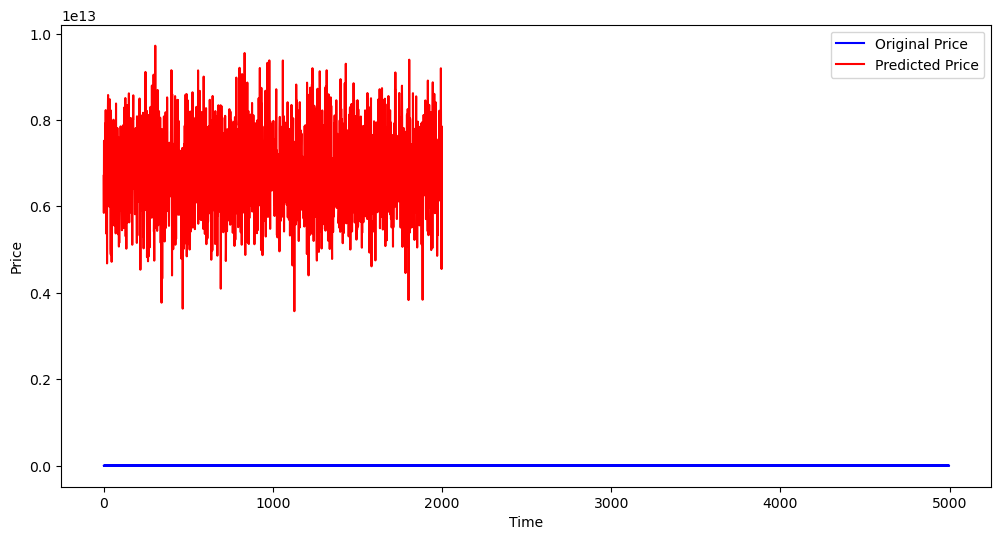

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 140672802227.5002
MSE: 2.014049087187078e+22
RMSE: 141917197237.93442
